In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# 1. Load and clean Data

In [5]:
 df= pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2015.csv')
 df16 = pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2016.csv')
 df17= pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2017.csv')

In [36]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
#2017 data have slightly different feature name and is missing "Region", making adjustments so all 3 datasets have uniform features.

df17 = pd.merge(df17, df16.loc[:, ['Country', 'Region']], on='Country')
df17.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

In [9]:
df17.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


In [46]:
df.shape

(158, 12)

In [47]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [48]:
df.groupby('Region')['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)'].mean().sort_values(by="Happiness Score", ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)
Region,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880
North America,10.000000,7.273000,0.036960,1.360400
Western Europe,29.523810,6.689619,0.037625,1.298596
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815
Eastern Asia,64.500000,5.626167,0.037225,1.151780
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438
Southeastern Asia,81.222222,5.317444,0.042691,0.789054
Southern Asia,113.142857,4.580857,0.032161,0.560486


# 2. EDA - Initial Data Visualization

<IPython.core.display.Javascript object>


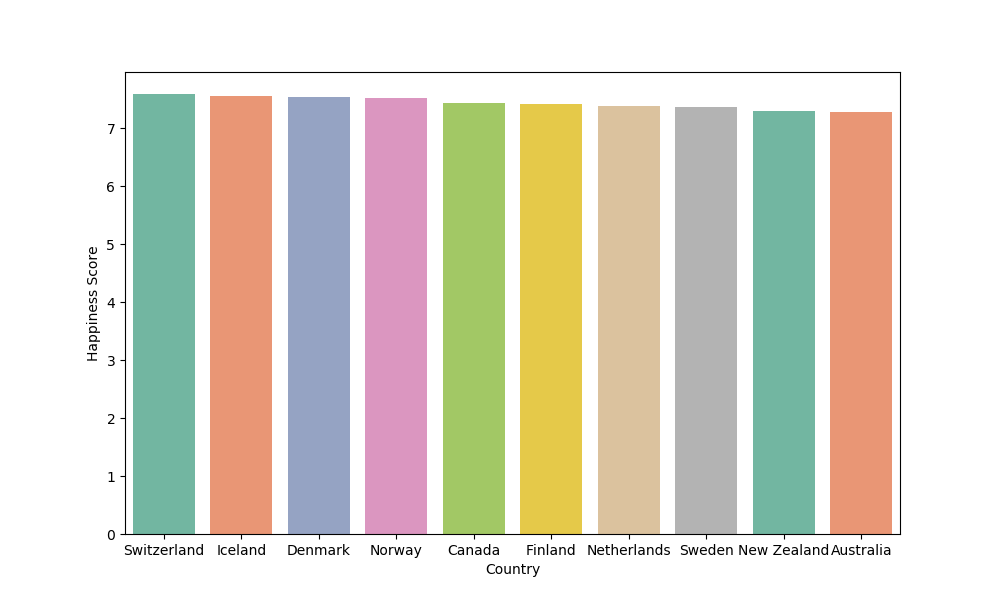

[Text(0,0.5,'Happiness Score'), Text(0.5,0,'Country')]

In [59]:
plt.figure(figsize=(10,6))
top10=df.sort_values(by=['Happiness Rank'],ascending=True).head(10)
ax=sns.barplot(x='Country',y='Happiness Score', data=top10, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

<IPython.core.display.Javascript object>


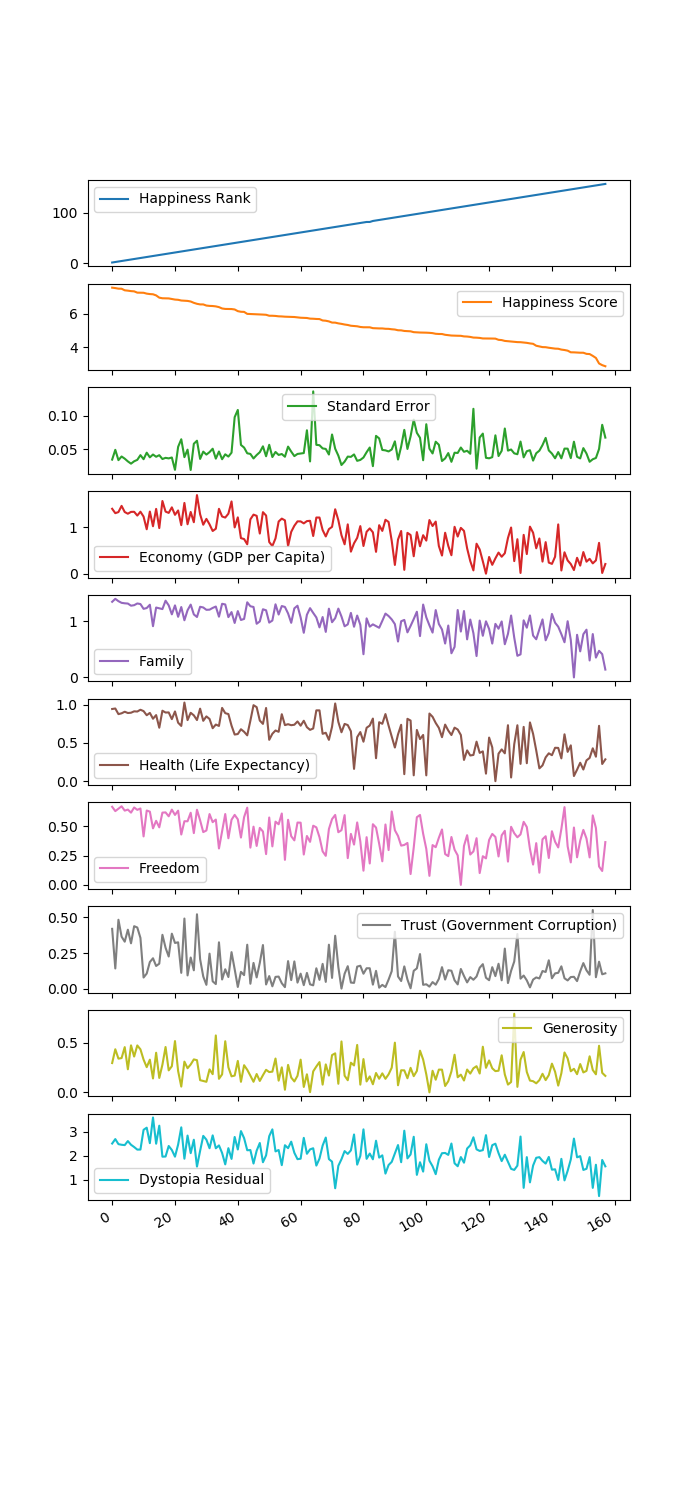

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC59B62208>,
      dtype=object)

In [115]:
#By visually inspecting, Corruption, and Generosity does not display 
#high correlation with happiness score, GDP per Capita, Life Expectancy are more correlated

df.plot(subplots=True, figsize=(7, 15))

<IPython.core.display.Javascript object>


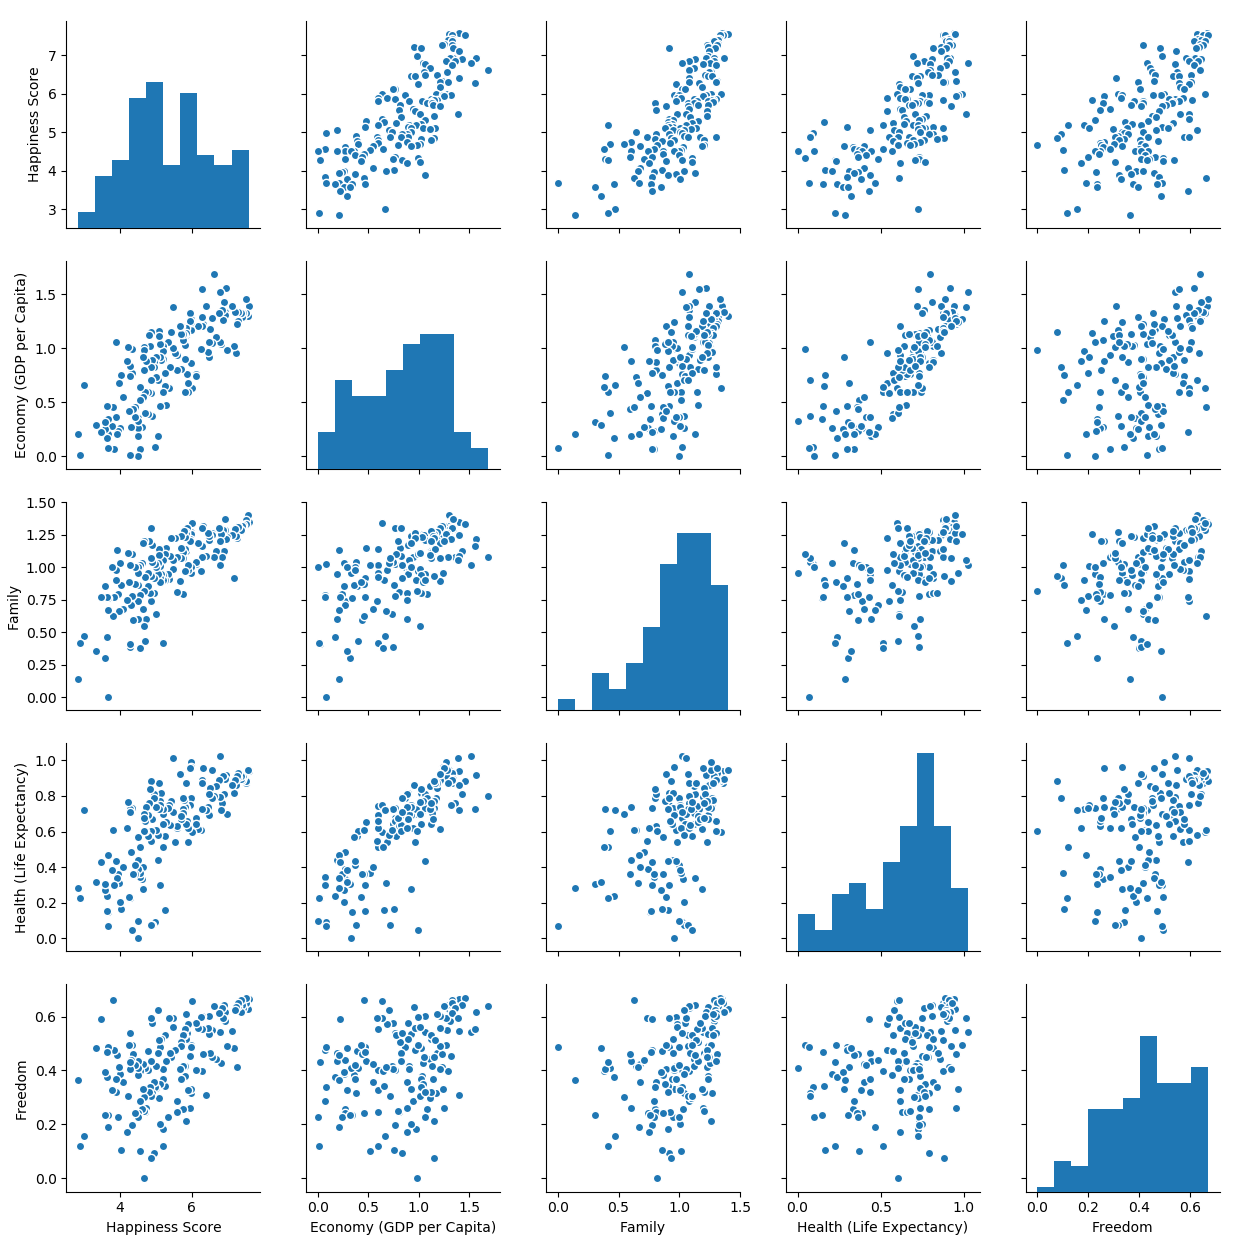

In [69]:
sns.pairplot(df[['Happiness Score','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom']])

In [6]:
from sklearn.cross_validation import train_test_split
x = df.iloc[:, 6:].values
y = df.iloc[:, 2].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

C:\Users\brizeng\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



<IPython.core.display.Javascript object>


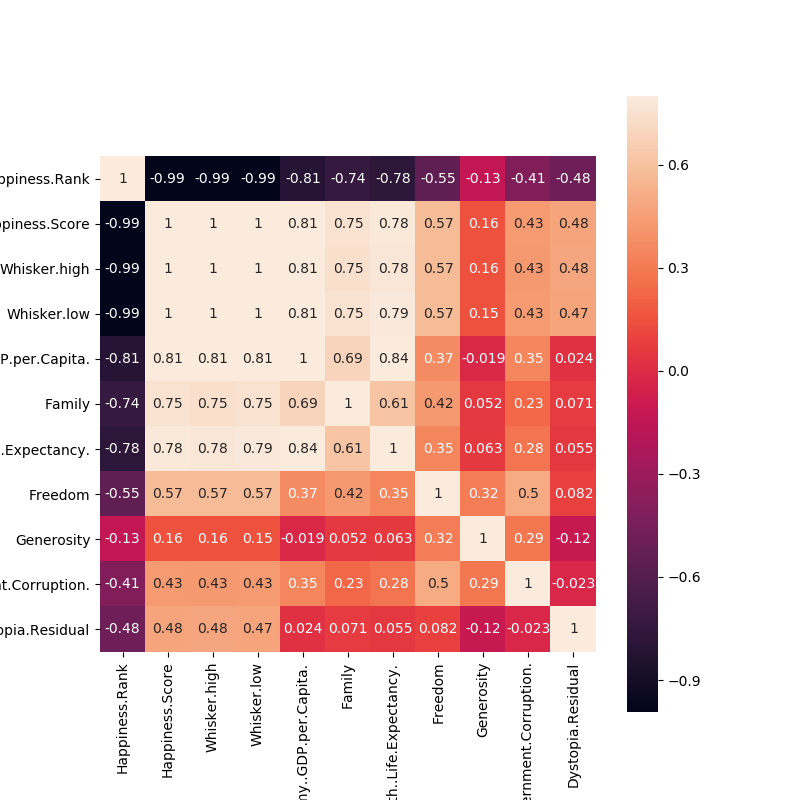

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True);

<IPython.core.display.Javascript object>


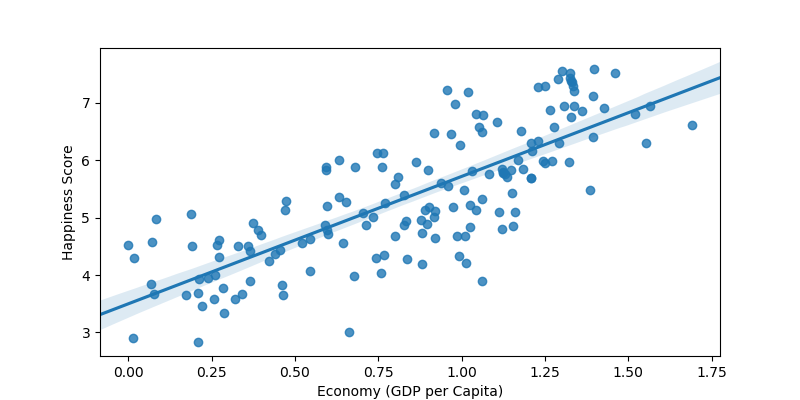

<IPython.core.display.Javascript object>


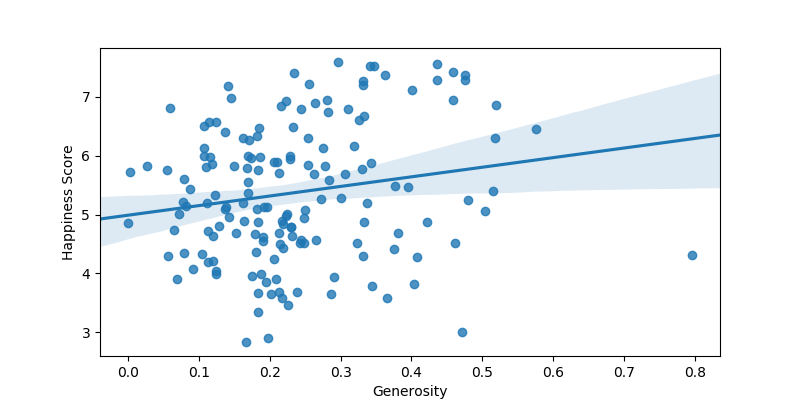

<IPython.core.display.Javascript object>


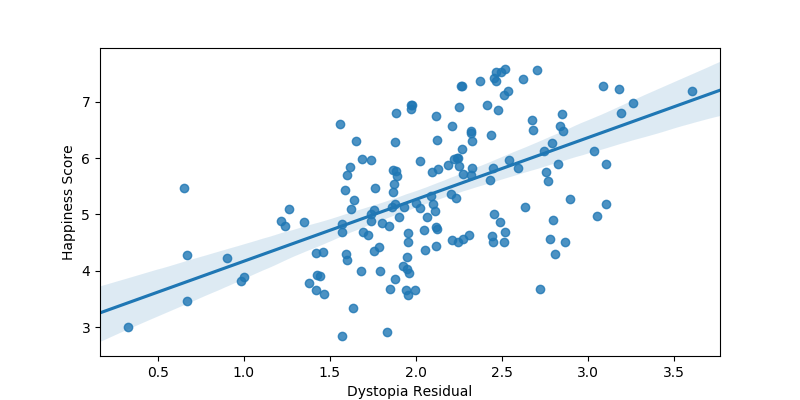

In [110]:
#No linear relationship in Generosity, Dystopia Residual
plt.figure(figsize=(8,4))
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score' ,data=df)
plt.figure(figsize=(8,4))
sns.regplot(x='Generosity',y='Happiness Score' ,data=df)
plt.figure(figsize=(8,4))
sns.regplot(x='Dystopia Residual',y='Happiness Score' ,data=df)

<IPython.core.display.Javascript object>


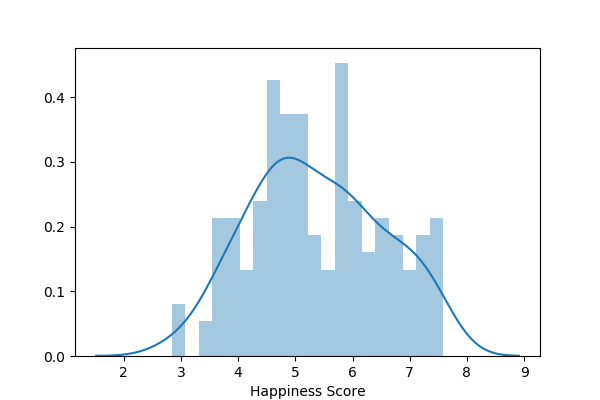

In [111]:
#High number of countries concentrated between 4-6 score
plt.figure(figsize=(6,4))
sns.distplot(df['Happiness Score'],kde=True, bins = 20)
plt.show()

# 3. Regional Data 

In [45]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

<IPython.core.display.Javascript object>


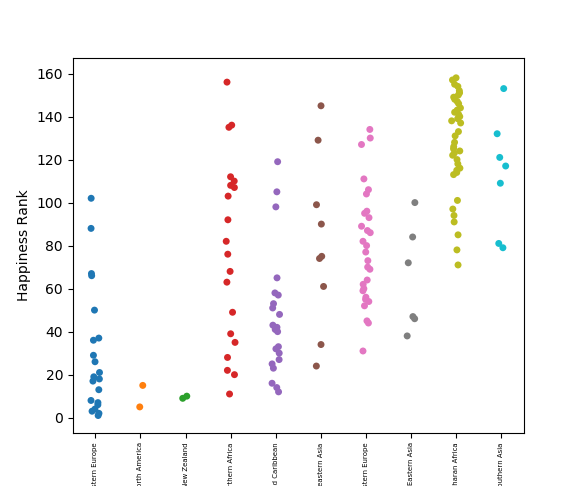

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [43]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(size=5,rotation=90)

<IPython.core.display.Javascript object>


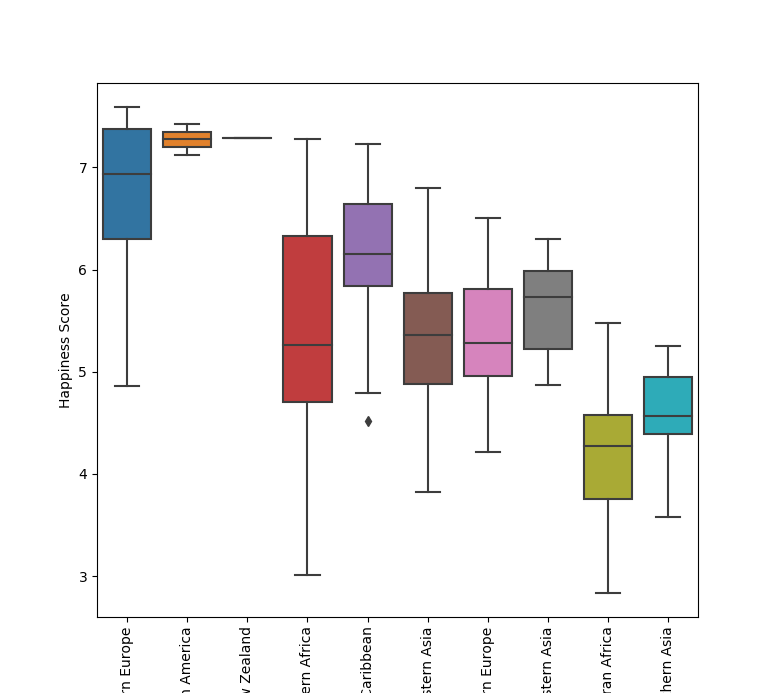

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [114]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Region', y='Happiness Score', data = df)
plt.xticks(rotation=90)

# 4. Rank Change Over Time

In [14]:
df17 ['Happiness Change']= df17['Happiness Score'] - df['Happiness Score']
df['Happiness Change'].describe()

count    150.000000
mean      -0.107107
std        0.123668
min       -0.751000
25%       -0.200500
50%       -0.095500
75%       -0.016250
max        0.102000
Name: Happiness Change, dtype: float64

In [15]:
country_max_change = df17['Happiness Change'].idxmax()
df17.loc[country_max_change]

Country                                           Macedonia
Happiness Rank                                           92
Happiness Score                                       5.175
Whisker.high                                        5.27217
Whisker.low                                         5.07783
Economy (GDP per Capita)                            1.06458
Family                                              1.20789
Health (Life Expectancy)                           0.644948
Freedom                                            0.325906
Generosity                                         0.253761
Trust (Government Corruption)                     0.0602778
Dystopia Residual                                   1.61747
Region                           Central and Eastern Europe
Happiness Change                                      0.102
Name: 89, dtype: object

In [17]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

In [18]:
#Macedonians became happier, their Happiness Change is greatest among all, and mostly due to an improved economy.
df17.loc[country_max_change, happiness_factors] - df.loc[country_max_change, happiness_factors]

Economy (GDP per Capita)           0.359258
Family                             0.172733
Health (Life Expectancy)          0.0638082
Freedom                           -0.299544
Generosity                       0.00385096
Trust (Government Corruption)    -0.0625122
Dystopia Residual                 -0.136131
Name: 89, dtype: object

In [20]:
by_region = df17.groupby('Region')

In [21]:
#The world is becoming increasily unhappy? Hedonic treadmill? Eastern Asia is doing better.

by_region[['Happiness Score', 'Happiness Change'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)

,Happiness Score,Happiness Change,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,,
Australia and New Zealand,7.299000,-0.025000,1.445060,1.529119,0.830323,0.607835,0.488852,0.342000,2.055834
North America,7.154500,-0.128000,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689
Western Europe,6.703714,-0.050381,1.457411,1.444946,0.824673,0.515125,0.303497,0.218999,1.939043
Latin America and Caribbean,5.957818,-0.097136,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928
Eastern Asia,5.496500,0.003000,1.231749,1.304615,0.778222,0.407620,0.173630,0.070685,1.529958
Southeastern Asia,5.444875,-0.088500,0.965253,1.249948,0.581918,0.534971,0.449860,0.127591,1.535369
Central and Eastern Europe,5.409931,-0.050345,1.092051,1.282285,0.636090,0.346609,0.186116,0.079620,1.787129
Middle East and Northern Africa,5.369684,-0.107579,1.168535,1.095511,0.605980,0.363768,0.199172,0.149084,1.787599
Southern Asia,4.628429,-0.079571,0.697479,0.931875,0.456658,0.398971,0.341446,0.103066,1.698851
